# **Алгоритмы kNN (k-Nearest Neighbors)**

## Идея

**Метод kNN** (k-Nearest Neighbors, k ближайших соседей) $-$ это метрический метод, использующийся для задач машинного обучения с учителем. Основная идея подобных методов заключается в **запоминании** обучающей выборки и поиску объектов, похожих на целевой, на этапе предсказания (*lazy learning*).

Так, kNN запоминает координаты каждого объекта. Значения его признаков $-$ это координаты точки в многомерном пространстве (если 3 признака, то трехмерное, если $n$, то $n$-мерное, как с векторами). Берем $k$ ближайших точек (например, 5) и смотрим, какая метка класса самая частая $-$ это и есть наше предсказание.

В основе метода лежит **гипотеза компактности**:
> Если два объекта похожи друг на друга, то ответы на них
тоже похожи.

Представим, что мы проводим классификацию объектов на два класса $-$ красный или жёлтый. Нам дана некоторая обучающая выборка и целевой объект (серый):
![](https://yastatic.net/s3/education-portal/media/2_1_b7525e2dd2_5d0a4ba929.webp)
*Источник: Яндекс.Хендбук*

Мы хотим определить, к какому классу относится серый объект. Интуитивно очевидно, что он должен быть жёлтым, потому что все его соседи жёлтые. Эта интуиция и отражает суть метода kNN $-$ классифицировать целевой объект, исходя из того, какие классы у объектов, которые максимально похожи на него.

Или, например, мы находим тексты, где распределение слов похожее и предсказываем самую популярную для них рубрику. Если у текста ближайшие соседи *\[политика, искусство, искусство, искусство, наука\]*, предсказываем *искусство*.

Если использовать формулы, то идея (на самом деле, чистая эвристика):
$$a(x)=\text{arg}\max_{y\in𝕐}\sum^k_{i=1}[y_{(i)}=y]$$
где $k$ $-$ это кол-во ближайших объектов (отсортированы по расстоянию).

## Метрики

Метрика в случае kNN $-$ это выбор функции расстояния между двумя объектами.
![](https://yastatic.net/s3/education-portal/media/2_2_8440e10f60_6a35a4f1bc.webp)
*Источник: Яндекс.Хендбук*

Метрики бывают разные, но самые частые:
- евклидова метрика,
$$ρ(x,z)=\sqrt{\sum^d_{j=1}(x_j-z_j)^2}$$
- манхэттенская метрика (устойчива к выбросам),
$$ρ(x,z)=\sum^d_{j=1}|x_j-z_j|$$
- метрика Минковского (обощение евклидовой и манхэттенской метрик),
- косинусное расстояние и т.д.

## Гиперпараметры и переобучение

Гиперпараметры $-$ это такие параметры модели, выбор которых лишь на основании обучающей выборки приведет к потере качества. Поэтому для этих параметров используют дополнительные валидационные данные. Так, в методе kNN количество соседей $k$ является гиперпараметром.

Переобучение (*overfitting*) дает хорошее качество на обучении и низкое качество на новых данных (картинка справа).
Обобщение (*generalization*) дает хорошее качество как на обучении, так и на новых данных (картинка посередине).

![](https://yastatic.net/s3/education-portal/media/classification_ee0f2f481d_9f063ccac1.webp)
*Источник: Яндекс.Хендбук*

### *Взвешенный kNN (weighted kNN)*

У оригинального алгоритма есть один недостаток: он никак не учитывает расстояния до соседних объектов, хотя эта информация может быть полезной.

Нам бы хотелось каким-то образом увеличивать вклад близких объектов и уменьшать вклад далёких. Можно заметить, что в формуле выше все соседи учитывались с одинаковыми коэффициентами. Однако мы можем назначить этим индикаторам веса: тем больше, чем ближе объект к целевому. Таким образом, получаем следующую формулу:

$$a(x)=\text{arg}\max_{y\in𝕐}\sum^k_{i=1}w_i[y_{(i)}=y]$$
где $k$ $-$ это кол-во ближайших объектов (отсортированы по расстоянию), а $w_i$ $-$ вес.

Вес $w_i$ может рассчитываться по разным формулам, например, линейным $\frac{k+1-i}{k}$ (просто в порядке следования элементов по близости) или Парзеновским окном c ядерными функциями (зависит от расстояния напрямую, а не от порядка).

### Итоги

**Плюсы**:
- kNN чрезвычайно прост в реализации.
- Это алгоритм "ленивого обучения", и поэтому он не требует обучения перед предсказанием, что делает kNN намного быстрее других алгоритмов, требующих обучения.
- Поскольку алгоритм не требует обучения перед предсказанием, можно легко добавить новые данные.
- Для реализации kNN требуется подбор всего двух гиперпараметров: значения $k$ и метрики расстояния (например, евклидовой или манхэттенской и т.д.).

**Минусы**:
- kNN плохо работает с данными большой размерности, поскольку при большом количестве измерений становится сложно вычислять расстояние.
- Он плохо работает с категориальными объектами.
- Надо хранить в памяти всю обучающую выборку.
- Часто слишком прост для задачи (мало способов настройки).
- Не все границы выделяемы при помощи kNN.

## Практика

### *Библиотеки*

Мы будем использовать библиотеку Scikit-Learn (Sklearn) $-$ это библиотека, в которой реализованы практически все важные алгоритмы машинного обучения.

Для реализации алгоритмов машинного обучения в `sklearn` всегда используется один интерфейс $-$ класс с функциями `fit(X, Y)` для обучения модели по обучающей выборке $X$, $Y$ и `predict(X)` для возвращения предсказаний на выборке $X$. При создании класса можно указывать дополнительные параметры, влияющие на работу алгоритма машинного обучения.

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline
warnings.filterwarnings('ignore')

### *Данные*

Мы возмем датасет ирисов Фишера (Fisher's iris dataset), который часто используется в машинном обучении. Он состоит из 150 образцов, равномерно распределенных по видам ирисов: *iris setosa*, *iris virginica* и *iris versicolor*.

У каждого объекта есть четыре признака: длина и ширина чашелистиков и лепестков в сантиметрах. Задача состоит в том, чтобы предсказать, к какому виду относится ирис на основе измерений чашелистиков и лепестков.

In [ ]:
# загружаем датасет и записываем его в датафрейм

dataset = datasets.load_iris()
df = pd.DataFrame(data=np.c_[dataset['data'], dataset['target']],
                    columns=dataset['feature_names'] + ['target'])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
# посмотрим на соответствия лейблов реальным названиям

dict(zip(dataset.target_names, df['target'].unique()))

{'setosa': 0.0, 'versicolor': 1.0, 'virginica': 2.0}

Соответствия: *iris setosa* (0), *iris versicolor* (1) и *iris virginica* (2).

### *Предварительный анализ*

<Axes: xlabel='target', ylabel='count'>

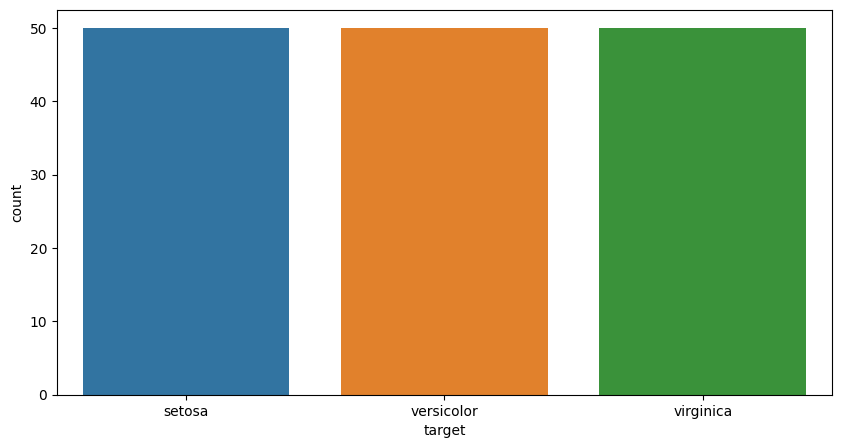

In [ ]:
# проверим, что 3 вида действительно равномерно рапределены

temp_df = df.copy()

temp_df['target'] = temp_df['target'].map(dict(zip( temp_df['target'].unique(), dataset.target_names)))
sns.countplot(x='target', hue='target', data=temp_df)

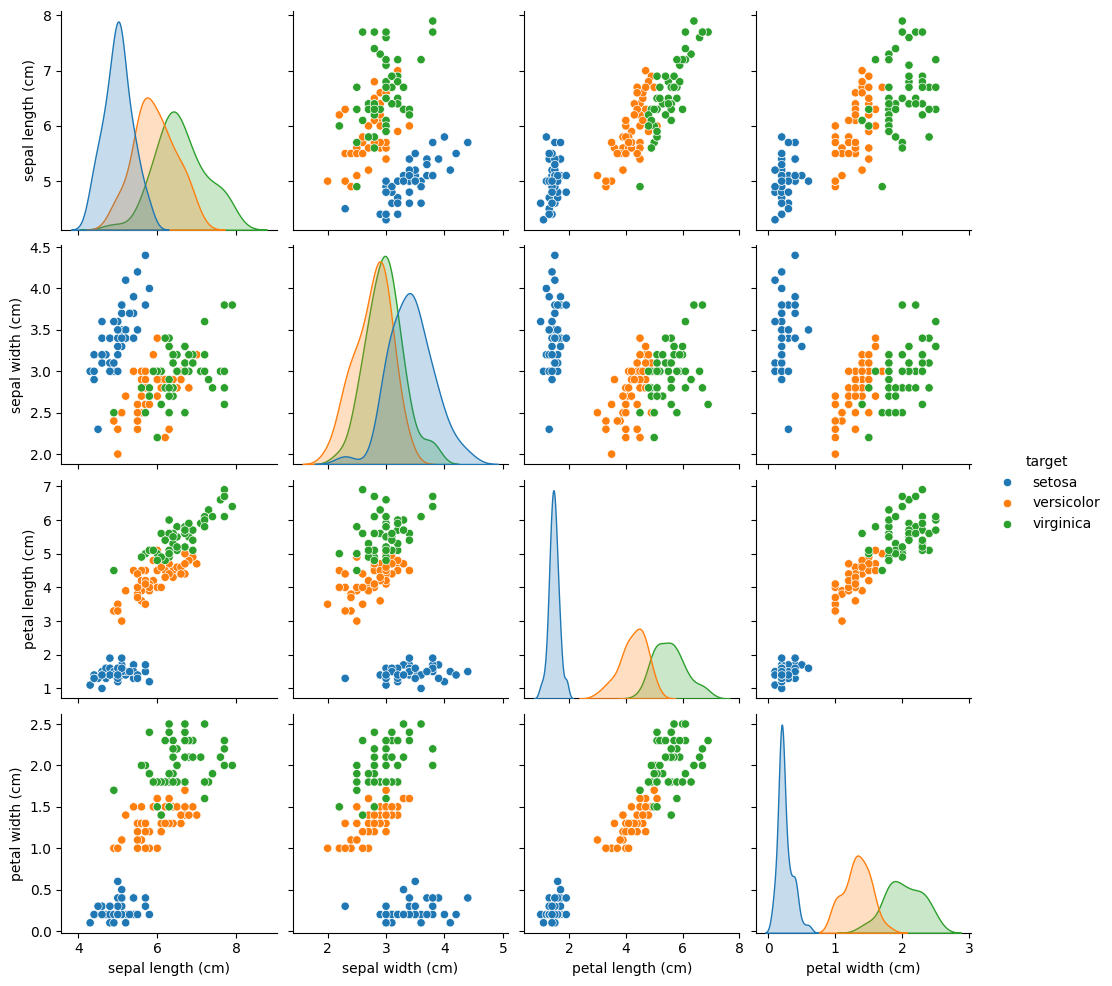

In [ ]:
# посмотрим на распределение всех трех классов по четырем параметрам

sns.pairplot(temp_df, hue='target');

### *Модель №1 (Длина и ширина чашелистиков)*

In [ ]:
# делим на параметры и целевые значения

X = df[['sepal length (cm)', 'sepal width (cm)']]
y_true = df['target']

# берем дефолтный kNN классификатор

model_1 = KNeighborsClassifier()  # metric='minkowski', n_neighbors=5, p=2, weights='uniform'
model_1.fit(X, y_true)

KNeighborsClassifier()

<Axes: >

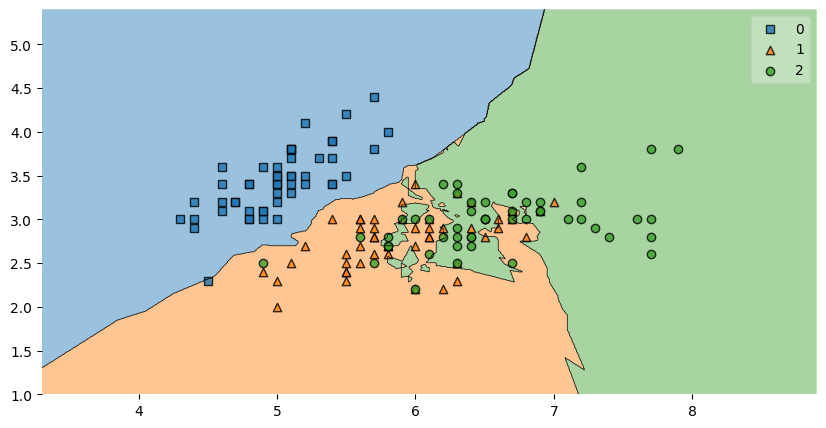

In [ ]:
# визуализируем разбивку

plot_decision_regions(X.values, y_true.values.flatten().astype(np.integer), model_1)

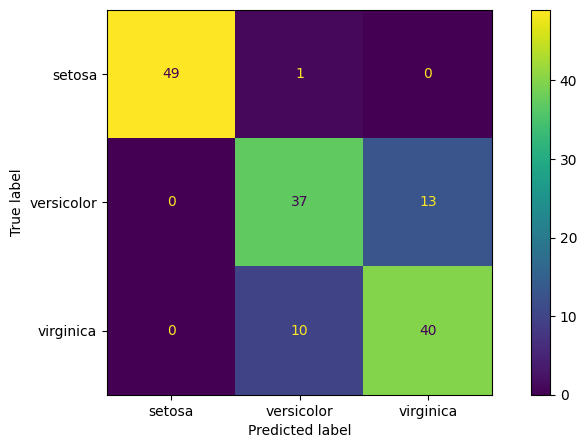

In [ ]:
# оцениваем модель

y_hat = model_1.predict(X)
labels = df['target'].unique()

matrix = confusion_matrix(y_true, y_hat, labels=labels, normalize=None)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                              display_labels=dataset.target_names)
disp.plot();

### *Модель №2 (длина и ширина лепестков)*

In [ ]:
# делим на параметры и целевые значения

X = df[['petal length (cm)', 'petal width (cm)']]
y_true = df[['target']]

# берем дефолтный kNN классификатор

model_2 = KNeighborsClassifier()  # дефолтно metric='minkowski', n_neighbors=5, p=2, weights='uniform'
model_2.fit(X, y_true)

KNeighborsClassifier()

<Axes: >

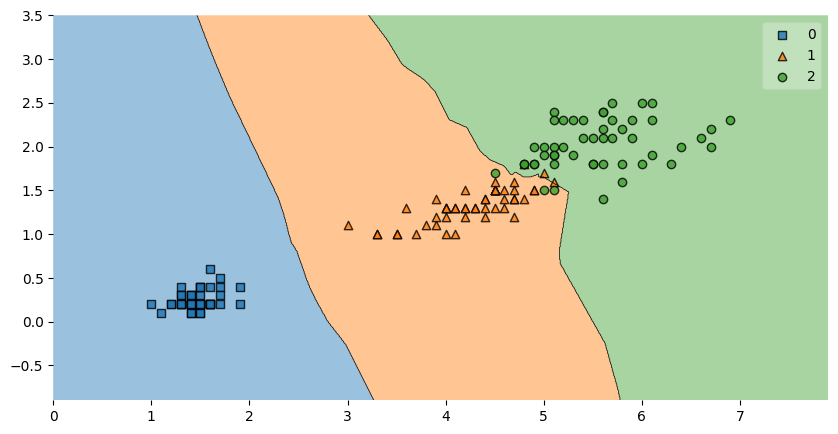

In [ ]:
# визуализируем разбивку

plot_decision_regions(X.values, y_true.values.flatten().astype(np.integer), model_2)

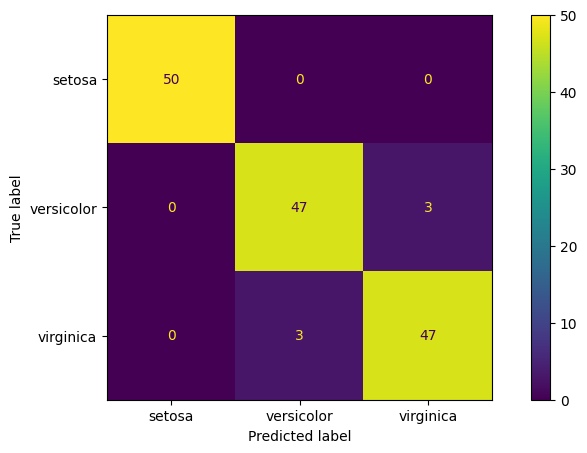

In [ ]:
# оцениваем модель

y_hat = model_2.predict(X)
labels = df['target'].unique()

matrix = confusion_matrix(y_true, y_hat, labels=labels, normalize=None)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                              display_labels=dataset.target_names)
disp.plot();

### *Модель №3 (все параметры)*

In [ ]:
# делим на параметры и целевые значения

X = df.drop(['target'], axis=1)

# берем дефолтный kNN классификатор

model_3 = KNeighborsClassifier()
model_3.fit(X, y_true)

KNeighborsClassifier()

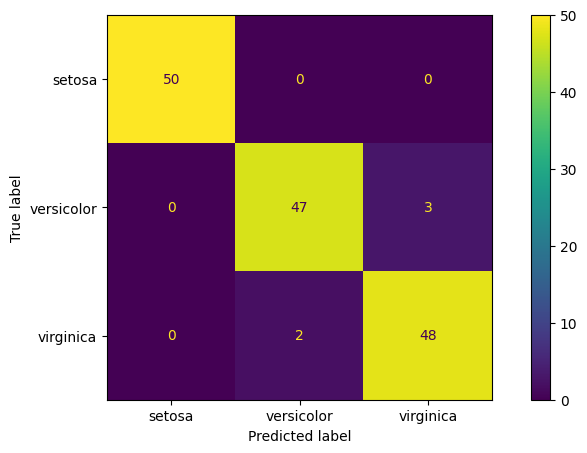

In [ ]:
# оцениваем модель

y_hat = model_3.predict(X)

matrix = confusion_matrix(y_true, y_hat, labels=labels, normalize=None)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                              display_labels=dataset.target_names)
disp.plot();

### *Модель №4 (выборки)*

Мы не хотим переобучиться, так что теперь будем делить наши данные на выборки.

In [ ]:
# делим на параметры и целевые значения

X = df.drop(['target'], axis=1)
y = df['target']

# разбиваем на тренировочную, тестовую и валидационную выборки

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1
    )

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.33, random_state=1
    )

In [ ]:
# подбираем гиперпараметр (кол-во соседей)

k_best = -1
best_accuracy = 0

for k in range(1, 10):
    # тренируем и предсказываем результат на валидационной выборке
    y_predicted = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_val)

    # оцениваем accuracy
    val_accuracy = accuracy_score(y_val, y_predicted)
    print(f'k = {k}; accuracy = {val_accuracy:.3f}')

    # записываем лучший результат
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        k_best = k

k = 1; accuracy = 1.000
k = 2; accuracy = 0.973
k = 3; accuracy = 1.000
k = 4; accuracy = 1.000
k = 5; accuracy = 0.973
k = 6; accuracy = 1.000
k = 7; accuracy = 1.000
k = 8; accuracy = 1.000
k = 9; accuracy = 1.000


In [ ]:
# тренируем классификацию с наилучшим кол-вом соседей

knn = KNeighborsClassifier(n_neighbors=k_best)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# предсказываем результат на тестовой выборке

preds = knn.predict(X_test)

# считаем метрики
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.94      1.00      0.97        15
         2.0       1.00      0.90      0.95        10

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



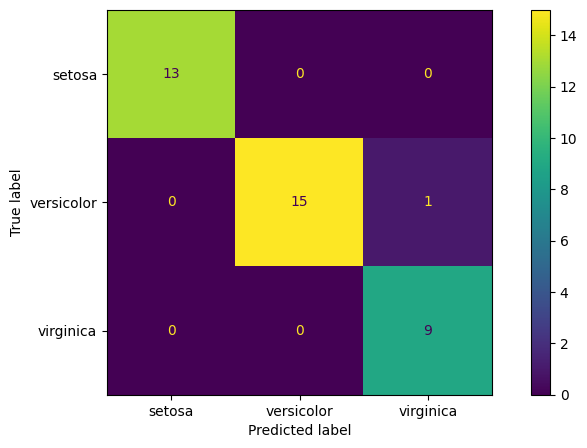

In [ ]:
# оцениваем модель

matrix = confusion_matrix(y_test, preds, labels=y.unique(), normalize=None)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                              display_labels=dataset.target_names)
disp.plot();

Accuracy на наших тестовых данных составляет 97%. Остальные метрики также подтверждают, что у нас очень низкий уровень ошибок в классификации.